In [1]:
import pandas as pd
import numpy as np

In [2]:
df_bikeShare = pd.read_csv('bikeshare-dataset-2020.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,2,5,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
#remove rows with missing values
df_bikeShare.dropna(axis='rows', how='any', inplace=True)

In [16]:
#convert 'Trip Duration' data type to numeric
df = pd.DataFrame(df_bikeShare)
df['Trip  Duration'] = pd.to_numeric(df['Trip  Duration'])

In [17]:
#convert 'Start Time' and 'End Time' data typeto date time 
from datetime import datetime
df['Start Time'] =  pd.to_datetime(df['Start Time'], errors='coerce', format="%m/%d/%Y %H:%M")

In [18]:
df['End Time'] =  pd.to_datetime(df['End Time'], errors='coerce', format="%m/%d/%Y %H:%M")

In [19]:
#split out start date column into day, month, year, time columns
df['Start Year'] = df['Start Time'].dt.year
df['Start Month'] = df['Start Time'].dt.month
df['Start Day'] = df['Start Time'].dt.day

df['End Year'] = df['End Time'].dt.year
df['End Month'] = df['End Time'].dt.month
df['End Day'] = df['End Time'].dt.day

In [20]:
df['Trip Start Time'] = df['Start Time'].dt.time

df['Trip End Time'] = df['End Time'].dt.time

In [21]:
df_bikeShare.dropna(axis='rows', how='any', inplace=True)

In [22]:
#Delete redundant columns
df_bikeShare.drop(['Start Time', 'End Time'], axis=1, inplace=True)

In [24]:
#Remove outliers - trip duration 1.5*IQR away from the median 
sorted('Trip  Duration')

Q1 = df_bikeShare['Trip  Duration'].quantile(0.25)
Q3 = df_bikeShare['Trip  Duration'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

791.0


In [25]:
dataset_outliersrm = df_bikeShare[~((df_bikeShare['Trip  Duration'] < (Q1 - 1.5 * IQR)) |(df_bikeShare['Trip  Duration'] > (Q3 + 1.5 * IQR)))]
dataset_outliersrm

Trip Id  Trip  Duration Start Station Id  \
0         7334128           648.0             7003   
1         7334129           419.0             7007   
2         7334130           566.0             7113   
3         7334131          1274.0             7333   
4         7334132           906.0             7009   
...           ...             ...              ...   
2911303  10644213           330.0             7010   
2911304  10644214           216.0             7288   
2911305  10644215           204.0             7288   
2911306  10644216          1659.0             7270   
2911307  10644217            63.0             7383   

                      Start Station Name End Station Id  \
0               Madison Ave / Bloor St W           7271   
1                  College St / Huron St           7163   
2           Parliament St / Aberdeen Ave           7108   
3                King St E / Victoria St           7311   
4                  King St E / Jarvis St           7004   
...                                  ...            ...   
2911303          King St W / Spadina Ave           7216   
2911304      Humber Bay Shores Park West           7514   
2911305      Humber Bay Shores Park West           7514   
2911306  Church St / Dundas St E - SMART           7270   
2911307                    12 Harbour St           7383   

                                  End Station Name Bike Id      User Type  \
0                  Yonge St / Alexander St - SMART    3104  Annual Member   
1                               Yonge St / Wood St    2126  Annual Member   
2                           Front St E / Cherry St    4425  Annual Member   
3                      Sherbourne St / Isabella St    4233  Annual Member   
4                          University Ave / Elm St    2341  Casual Member   
...                                            ...     ...            ...   
2911303              Wellington St W / Stafford St    3458  Annual Member   
2911304  Humber Bay Shores Park / Marine Parade Dr    4085  Annual Member   
2911305  Humber Bay Shores Park / Marine Parade Dr    3580  Annual Member   
2911306            Church St / Dundas St E - SMART    5137  Annual Member   
2911307                              12 Harbour St    5622  Annual Member   

         Start Year  Start Month  Start Day  End Year  End Month  End Day  \
0              2020            1          1      2020          1        1   
1              2020            1          1      2020          1        1   
2              2020            1          1      2020          1        1   
3              2020            1          1      2020          1        1   
4              2020            1          1      2020          1        1   
...             ...          ...        ...       ...        ...      ...   
2911303        2020           12         31      2020         12       31   
2911304        2020           12         31      2020         12       31   
2911305        2020           12         31      2020         12       31   
2911306        2020           12         31      2021          1        1   
2911307        2020           12         31      2020         12       31   

        Trip Start Time Trip End Time  
0              00:08:00      00:19:00  
1              00:10:00      00:17:00  
2              00:13:00      00:22:00  
3              00:17:00      00:38:00  
4              00:19:00      00:34:00  
...                 ...           ...  
2911303        23:52:00      23:57:00  
2911304        23:54:00      23:58:00  
2911305        23:54:00      23:58:00  
2911306        23:56:00      00:24:00  
2911307        23:57:00      23:58:00  

[2788330 rows x 16 columns]

In [26]:
#apply correlation to look for features to use in models
import matplotlib.pyplot as plt
import seaborn as sn

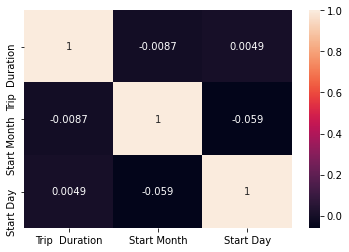

In [27]:
data = dataset_outliersrm

df = pd.DataFrame(data,columns=['Trip  Duration', 'Start Month', 'Start Day', 'Trip Start Time', 'Trip End Time'])

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot = True)
plt.show()

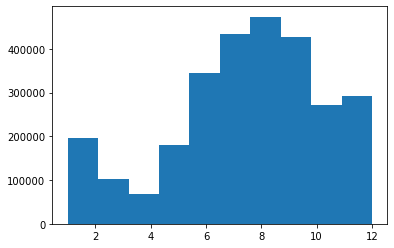

In [28]:
x = dataset_outliersrm['Start Month']
plt.hist(x)
plt.show()

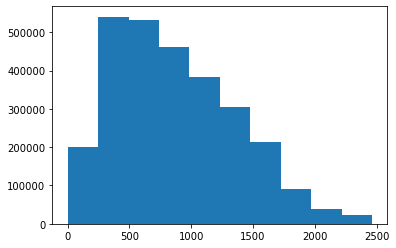

In [29]:
x = dataset_outliersrm['Trip  Duration']
plt.hist(x)
plt.show()

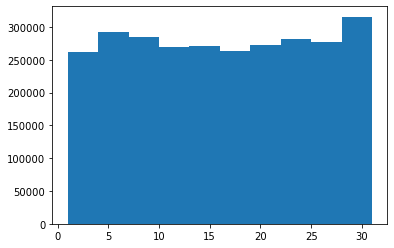

In [30]:
x = dataset_outliersrm['Start Day']
plt.hist(x)
plt.show()